In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train= pd.read_csv('sign_mnist_train.csv')
test= pd.read_csv('sign_mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
labels=train['label'].values

In [6]:
unique_val=np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot: ylabel='count'>

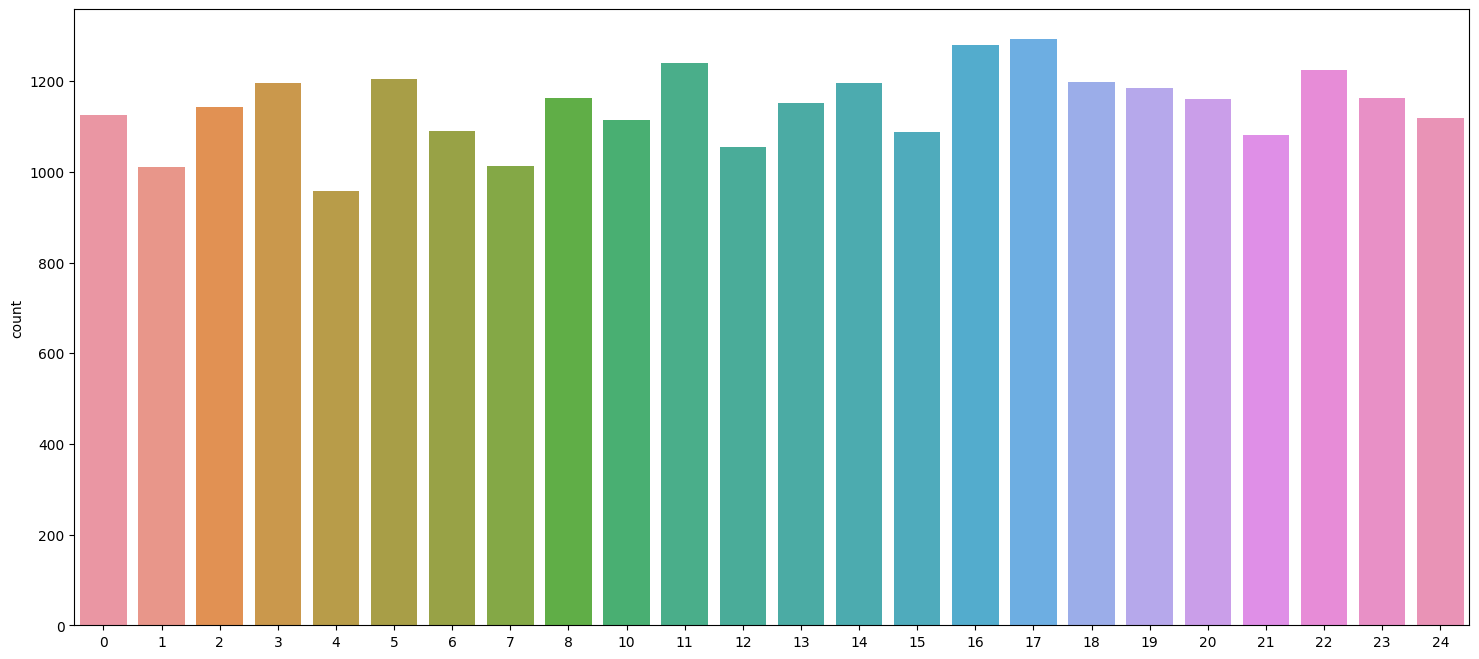

In [7]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [8]:
train.drop('label', axis = 1, inplace= True)

In [9]:
images=train.values
images= np.array([np.reshape(i,(28,28))for i in images])
images=np.array([i.flatten()for i in images])

In [10]:
from sklearn.preprocessing import LabelBinarizer

label_binriazer= LabelBinarizer()
labels = label_binriazer.fit_transform(labels)

In [11]:
labels
#len(labels[0])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [3]:
index= 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

NameError: name 'labels' is not defined

In [2]:
import cv2
import numpy as np

for i in range(0,10):
    rand=np.random.randint(0, len(images))
    input_im=images[rand]
    
    sample=input_im.reshape(28,28).astype(np.uint8)
    sample= cv2.resize(sample, None, fx=10, fy=10, interpolation= cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0)
    
cv2.destroyeAllWindows()

NameError: name 'images' is not defined

In [1]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(images, labels, test_size=0.3, random_state=101)

NameError: name 'images' is not defined

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout

batch_size=128
num_classes=24
epochs=10

2023-01-23 00:41:52.725473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
x_train=x_train/255
x_test=x_test/255

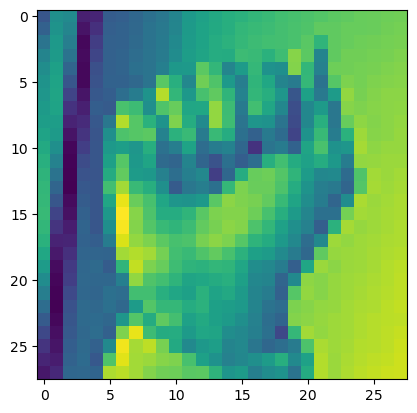

In [15]:
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test= x_test.reshape(x_test.shape[0],28,28,1)

plt.imshow(x_train[0].reshape(28,28))

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam
import tensorflow as tf


model= Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu', input_shape=(28, 28 , 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))

2023-01-23 00:42:11.826605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [18]:
print ("training")
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)


training
Epoch 1/10


ValueError: in user code:

    File "/Users/samuelgetnet/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/samuelgetnet/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/samuelgetnet/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/samuelgetnet/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/Users/samuelgetnet/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/samuelgetnet/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28, 1), found shape=(None, 784)


In [21]:
model.save("sign_lang_recognition.h5")
print("model is saved")

model is saved


In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])


plt.show

NameError: name 'history' is not defined

In [32]:
test_labels=test['label']
test.drop('label',axis =1, inplace= True)

test_images=test.values
test_images=np.array([np.reshape(i,(28,28))for i in test_images])
test_images=np.array([i.flatten() for i in test_images])


KeyError: 'label'

[ WARN:0@0.054] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_506zufg7xt/croots/recipe/opencv-suite_1664548331847/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


: 

: 